In [18]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import pickle
import functions as f
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error 


In [19]:
# import 10 fold validation with 160 predictors

regression160 = pd.read_pickle('linearRegression160.pkl')
regressionScores160 = pd.read_pickle('linearRegressionScores160.pkl')

mean_coefficients160 = regression160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
std_coefficients160 = regression160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

In [ ]:
# import 10 fold validation with 8 transcription factors

regression8 = pd.read_pickle('velocityRegression8.pkl')
regressionScores8 = pd.read_pickle('velocityRegressionScores8.pkl')

mean_coefficients8 = regression8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
std_coefficients8 = regression8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

In [ ]:
# import 10 fold validation ridge regression with 8 tf

ridge8 = pd.read_pickle('ridgeRegression8.pkl')
ridgeScores8 = pd.read_pickle('ridgeRegressionScores8.pkl')

ridge_mean_coefficients8 = ridge8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
ridge_std_coefficients8 = ridge8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

#ridge_residuals = pd.read_pickle('ridgeResiduals8.pkl')

In [ ]:
# import 10 fold validation lasso regression with 8 tf

lasso8 = pd.read_pickle('lassoRegression8.pkl')
lassoScores8 = pd.read_pickle('lassoRegressionScores8.pkl')

lasso_mean_coefficients8 = lasso8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
lasso_std_coefficients8 = lasso8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

I started off looking at the data using 8 predictors. The following shows the clustermap of the mean coefficients accross the data from the 10 fold cross validation. 

In [ ]:
l = sns.clustermap(mean_coefficients8, cmap='coolwarm')

There are some patterns, so the model is not just random. The branch all the way to the right seems to be positively correlated by Mcm5 and negatively correlated by Mcm6. Also noteworthy is the dark area of inner branch in the top right. 

In [ ]:
reordered = f.reorder_like_clustermap(std_coefficients8, l)
h = sns.heatmap(reordered)

In [ ]:
# ridge regression
r = sns.clustermap(ridge_mean_coefficients8, cmap='coolwarm')
r.savefig('ridge_mean8.pdf')

In [ ]:
reordered = f.reorder_like_clustermap(ridge_std_coefficients8, r)
sns.heatmap(reordered)

In [ ]:
# lasso regression
s = sns.clustermap(lasso_mean_coefficients8, cmap='coolwarm')
s.savefig('lasso_mean8')

In [ ]:
reo = f.reorder_like_clustermap(lasso_std_coefficients8, s)
sns.heatmap(reo)

Looking at the clustermap of all 160 predictive genes and 10 fold cross validation, it is very hard to see patterns. I believe that the predictive genes at the top show a little bit more structure but it is difficult to make any conclusions. 

In [ ]:
s = sns.clustermap(mean_coefficients160, cmap='coolwarm')
s.savefig('linear_mean160')

I am not sure what to make of the standard deviations. The values are incredibly high in total ? 

In [ ]:
sns.clustermap(std_coefficients160, cmap='coolwarm')

Lets take a look at the heatmaps of proportions (sum residuals/sum absolute response values)

-> if model fits data well -> residuals closer to 0 but sum absolute response values higher -> lower score
-> if model does not fit data well -> high residuals (model can be arbitrairily bad) -> higher score

--> the lower the score the better the model fits the data

## maybe order these the same way as the clustermaps..

# Mean / SD 
#### In the following we take a look at large coefficients (large mean) that also have a smaller standard deviation. 
-> if values are large: large mean comined with small standard deviation
-> if values are small: either small mean with large stanard deviation or larger mean with very large standard deviation

!!!plot again on absolute -> dont have to look at two tails
compare to confidence of velocity gene predictions 

<AxesSubplot:xlabel='coefficients', ylabel='Count'>

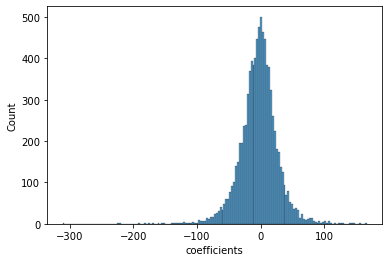

In [43]:
mean = regression8.groupby(['target', 'predictors']).coefficients.mean()
std = regression8.groupby(['target', 'predictors']).coefficients.std()
sns.histplot(mean/std)

In [25]:
msl = mean/std

In [26]:
msl.nlargest(10)

target  predictors
Cbx5    Mcm6          167.099848
Rps2    Tox           157.263492
Malat1  Mcm6          147.913842
Fxyd5   Hmgb2         144.109447
Tox     Hif1a         142.932612
Ifngr1  Tox           139.749956
Fxyd5   Mcm6          128.938657
Hp1bp3  Cdk4          124.963360
Mcm4    Cdk4          121.910946
Il23r   Hif1a         116.459367
Name: coefficients, dtype: float64

In [27]:
msl.nsmallest(10)

target    predictors
Rasgrp2   Klf2         -311.220772
Lsp1      Mcm6         -225.610417
Rrm1      Hmgb2        -222.507507
Tk1       Hmgb2        -190.215090
Anp32e    Hmgb2        -190.208367
Ptma      Hmgb2        -181.273951
Hsp90ab1  Hif1a        -176.193638
Tox       Klf2         -170.282911
          Tox          -159.212917
S100a6    Klf2         -154.466035
Name: coefficients, dtype: float64

# Proportions of residuals

## Ridge regression

<AxesSubplot:>

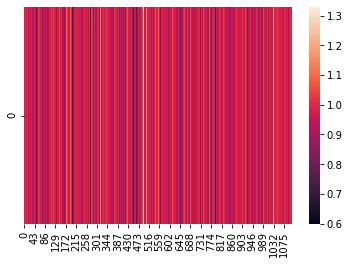

In [41]:
# residuals ridge
sns.heatmap(np.matrix(ridgeScores8.groupby('target').test_proportion.mean().tolist()))

This is the mean: 0.95653684592333


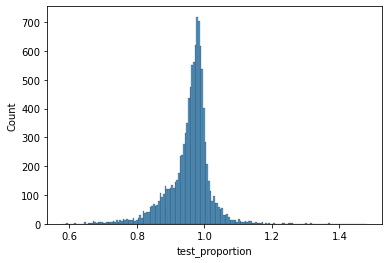

In [42]:
sns.histplot(ridgeScores8['test_proportion'])
print('This is the mean:',np.mean(ridgeScores8['test_proportion']))

In [ ]:
mean = regression8.groupby(['target', 'predictors']).coefficients.mean()
std = regression8.groupby(['target', 'predictors']).coefficients.std()
sns.histplot(mean/std)

In [ ]:
ms = mean/std


In [ ]:
ms.nlargest(10)

In [ ]:
ms.nsmallest(10)

In [52]:
ridgeScores8.sort_values("test_proportion")[:10]

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion,target
9,Ridge(),0.627312,0.608711,-0.378421,-0.390550,0.579740,0.599100,Rasgrp2
7,Ridge(),0.609187,0.610776,-0.387985,-0.389499,0.588858,0.598153,Rasgrp2
6,Ridge(),0.625281,0.608800,-0.401087,-0.388102,0.589777,0.597743,Rasgrp2
3,Ridge(),0.612265,0.610411,-0.403482,-0.387792,0.589777,0.597635,Rasgrp2
4,Ridge(),0.612139,0.610435,-0.373032,-0.391174,0.593465,0.597569,Rasgrp2
1,Ridge(),0.615683,0.610060,-0.385809,-0.389740,0.593573,0.597852,Rasgrp2
2,Ridge(),0.610881,0.610608,-0.390526,-0.389202,0.598641,0.596958,Rasgrp2
5,Ridge(),0.593179,0.612540,-0.411996,-0.386820,0.607374,0.596243,Rasgrp2
0,Ridge(),0.606362,0.611039,-0.364463,-0.392123,0.616586,0.595532,Rasgrp2
8,Ridge(),0.585311,0.613340,-0.401914,-0.387951,0.619226,0.594930,Rasgrp2


## Linear Regression 

<AxesSubplot:>

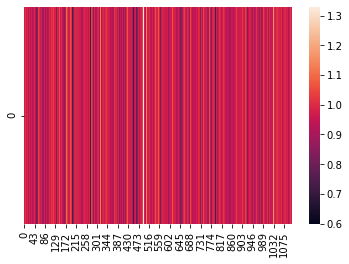

In [44]:
# residuals ridge
sns.heatmap(np.matrix(regressionScores8.groupby('target').test_proportion.mean().tolist()))

This is the mean: 0.9565557135022149


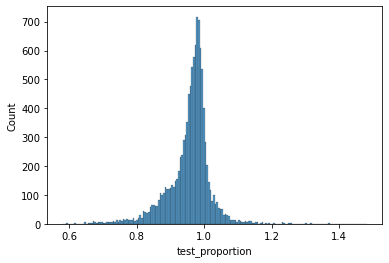

In [45]:
sns.histplot(regressionScores8['test_proportion'])
print('This is the mean:',np.mean(regressionScores8['test_proportion']))

## Lasso alpha = 0.000013
This does not work since I have not been able to generate the data. The kernel keeps getting killed. 

In [47]:
# residuals ridge
sns.heatmap(np.matrix(lassoScores8.groupby('target').test_proportion.mean().tolist()))

In [ ]:
sns.histplot(lassoScores8['test_proportion'])
print('This is the mean:',np.mean(lassoScores8['test_proportion']))